In [5]:
import pandas as pd

data = pd.read_csv("thanksgiving-2015-poll-data.csv")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [8]:
data["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
data.columns[50:]

Index([u'Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1',
       u'Do you typically pray before or after the Thanksgiving meal?',
       u'How far will you travel for Thanksgiving?',
       u'Will you watch any of the following programs on Thanksgiving? Please select all that apply. - Macy's Parade',
       u'What's the age cutoff at your "kids' table" at Thanksgiving?',
       u'Have you ever tried to meet up with hometown friends on Thanksgiving night?',
       u'Have you ever attended a "Friendsgiving?"',
       u'Will you shop any Black Friday sales on Thanksgiving Day?',
       u'Do you work in retail?',
       u'Will you employer make you work on Black Friday?',
       u'How would you describe where you live?', u'Age',
       u'What is your gender?',
       u'How much total combined money did all members of your HOUSEHOLD earn last year?',
       u'US Region'],
      dtype='object')

In [10]:
data["What is your gender?"].value_counts(dropna = True)

Female    544
Male      481
Name: What is your gender?, dtype: int64

In [12]:
import math
def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "False")

In [13]:
data["What is your gender?"].apply(gender_code)
data["What is your gender?"].value_counts(dropna = False)

Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [14]:
data.apply(lambda x: x.dtype).head()

RespondentID                                                                             object
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

In [16]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts(dropna = False)

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
NaN                      33
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [21]:
import numpy as np

def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace(",", "").replace("$", "")
    income_high, income_low = value.split(" to ")
    return (int(income_high) + int(income_low)) / 2

In [22]:
data["income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0     87499.0
1     62499.0
2      4999.0
3    200000.0
4    112499.0
Name: income, dtype: float64

In [23]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

In [26]:
homemade = data[data["What type of cranberry saucedo you typically have?"] == "Homemade"]
canned = data[data["What type of cranberry saucedo you typically have?"] == "Canned"]

print(homemade["income"].mean())
print(canned["income"].mean())

94877.6720648
83822.9431818


In [27]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

In [28]:
grouped.groups

{'Canned': Int64Index([   4,    6,    8,   11,   12,   15,   18,   19,   26,   27,
             ...
             1040, 1041, 1042, 1044, 1045, 1046, 1047, 1051, 1054, 1057],
            dtype='int64', length=502),
 'Homemade': Int64Index([   2,    3,    5,    7,   13,   14,   16,   20,   21,   23,
             ...
             1016, 1017, 1025, 1027, 1030, 1034, 1048, 1049, 1053, 1056],
            dtype='int64', length=301),
 'None': Int64Index([   0,   17,   24,   29,   34,   36,   40,   47,   49,   51,
             ...
              980,  981,  997, 1015, 1018, 1031, 1037, 1043, 1050, 1055],
            dtype='int64', length=146),
 'Other (please specify)': Int64Index([   1,    9,  154,  216,  221,  233,  249,  265,  301,  336,  380,
              435,  444,  447,  513,  550,  749,  750,  784,  807,  860,  872,
              905, 1000, 1007],
            dtype='int64')}

In [29]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [31]:
for name, group in grouped:
    print name
    print group.shape
    print type(group)

Canned
(502, 66)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 66)
<class 'pandas.core.frame.DataFrame'>
None
(146, 66)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 66)
<class 'pandas.core.frame.DataFrame'>


In [32]:
grouped["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [33]:
grouped["income"].agg(np.mean)

What type of cranberry saucedo you typically have?
Canned                    83822.943182
Homemade                  94877.672065
None                      78885.613445
Other (please specify)    86629.521739
Name: income, dtype: float64

In [34]:
grouped.agg(np.mean)

,RespondentID,income
What type of cranberry saucedo you typically have?,,
Canned,4336699416,83822.943182
Homemade,4336792040,94877.672065
None,4336764989,78885.613445
Other (please specify),4336763253,86629.521739


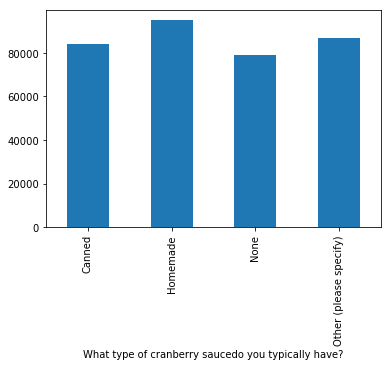

In [36]:
%matplotlib inline

sauce = grouped.agg(np.mean)
sauce["income"].plot(kind = 'bar')

In [39]:
grouped = data.groupby(["What type of cranberry saucedo you typically have?", "What is typically the main dish at your Thanksgiving dinner?"])
grouped.agg(np.mean)

RespondentID  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                               4336354418   
                                                   Ham/Pork                                              4336757434   
                                                   I don't know                                          4335987430   
                                                   Other (please specify)                                4336682072   
                                                   Roast beef                                            4336254414   
                                                   Tofurkey                                              4337156546   
                                                   Turkey                                                4336705225   
Homemade                                           Chicken                                               4336539693   
                                                   Ham/Pork                                              4337252861   
                                                   I don't know                                          4336083561   
                                                   Other (please specify)                                4336863306   
                                                   Roast beef                                            4336173790   
                                                   Tofurkey                                              4336789676   
                                                   Turducken                                             4337475308   
                                                   Turkey                                                4336790802   
None                                               Chicken                                               4336150656   
                                                   Ham/Pork                                              4336679896   
                                                   I don't know                                          4336412261   
                                                   Other (please specify)                                4336687790   
                                                   Roast beef                                            4337423740   
                                                   Tofurkey                                              4336950068   
                                                   Turducken                                             4336738591   
                                                   Turkey                                                4336784218   
Other (please specify)                             Ham/Pork                                              4336465104   
                                                   Other (please specify)                                4337335395   
                                                   Tofurkey                                              4336121663   
                                                   Turkey                                                4336724418   

                                                                                                              income  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                 
Canned                                             Chicken                                              80999.200000  
                                                   Ham/Pork                                             77499.071429  
                                                   I don't know                                          4999.000000  
                                                   Other

In [40]:
grouped["income"].agg([np.mean, np.sum, np.std]).head(10)

mean  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                  
Canned                                             Chicken                                              80999.200000   
                                                   Ham/Pork                                             77499.071429   
                                                   I don't know                                          4999.000000   
                                                   Other (please specify)                               53213.285714   
                                                   Roast beef                                           25499.000000   
                                                   Tofurkey                                            100713.428571   
                                                   Turkey                                               85242.221945   
Homemade                                           Chicken                                              19999.000000   
                                                   Ham/Pork                                             96874.250000   
                                                   I don't know                                                  NaN   

                                                                                                              sum  \
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...               
Canned                                             Chicken                                               404996.0   
                                                   Ham/Pork                                             1084987.0   
                                                   I don't know                                            4999.0   
                                                   Other (please specify)                                372493.0   
                                                   Roast beef                                            127495.0   
                                                   Tofurkey                                              704994.0   
                                                   Turkey                                              34182131.0   
Homemade                                           Chicken                                                59997.0   
                                                   Ham/Pork                                              387497.0   
                                                   I don't know                                               NaN   

                                                                                                                std  
What type of cranberry saucedo you typically have? What is typically the main dish at your Thanksg...                
Canned                                             Chicken                                             75779.677356  
                                                   Ham/Pork                                            56645.147121  
                                                   I don't know                                                 NaN  
                                                   Other (please specify)                              29780.946290  
                                                   Roast beef                                          24584.039538  
                                                   Tofurkey                                            61351.619299  
                                                   Turkey                                              55687.518532  
Homemade                                           Chicken                                             16393.596311  
                                                   Ham/Pork                           

In [42]:
grouped = data.groupby("How would you describe where you live?")["What is typically the main dish at your Thanksgiving dinner?"]
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Chicken                     2
                                        Turducken                   2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           